In [180]:
import statsmodels.tsa.api as tsa
import pandas as pd
import numpy as np
import datetime
from random import randrange
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = pd.read_excel(r"C:\Users\Ruller\Downloads\problems\problem_1.xlsx", parse_dates=['date'], index_col='date') # read the excel file in data frame object
data = data.dropna() # remove missing data 
data.head()
factors = pd.DataFrame(data=data)
print(factors)
# MAKE SURE THEY ARE STATIONARY THE INITAL TIME SERIES. 

             stock_1  factor_1  factor_2  factor_3
date                                              
2017-06-30 -0.653845  0.118685  0.195143 -0.052389
2017-07-31 -8.208948 -0.007788 -0.071034  0.094496
2017-08-31  0.090122  0.132189  0.085711 -0.066484
2017-09-29 -0.467503  0.132189  0.085711 -0.066484
2017-10-31 -0.526875  0.015240  0.051610  0.107700
2017-11-30  0.794911  0.017855  0.038808  0.010421
2017-12-29 -0.753880  0.017855  0.038808  0.010421
2018-01-31  0.400484  0.123442  0.090615  0.066421
2018-02-28 -6.605226  0.057903 -0.060465 -0.198582
2018-03-30  0.000000  0.057903 -0.060465 -0.198582
2018-04-30 -1.252616  0.019211  0.050085 -0.004424
2018-05-31 -1.448595 -0.118646  0.198999  0.053926
2018-06-29 -3.441012 -0.118646  0.198999  0.053926
2018-07-31  1.644361 -0.093252 -0.061627 -0.090709
2018-08-31 -1.242018 -0.137885 -0.128545 -0.003366
2018-09-28  0.282049 -0.137885 -0.128545 -0.003366
2018-10-31  3.647995  0.299212  0.187921 -0.025202
2018-11-30 -2.877015  0.279493 

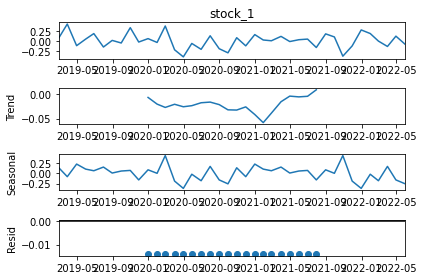

In [155]:
result = tsa.seasonal_decompose(factors['stock_1'][1:], model='additive', period=20)
#sd_detrend = result.observed - result.trend
result.plot()
pyplot.show()

<AxesSubplot:xlabel='date'>

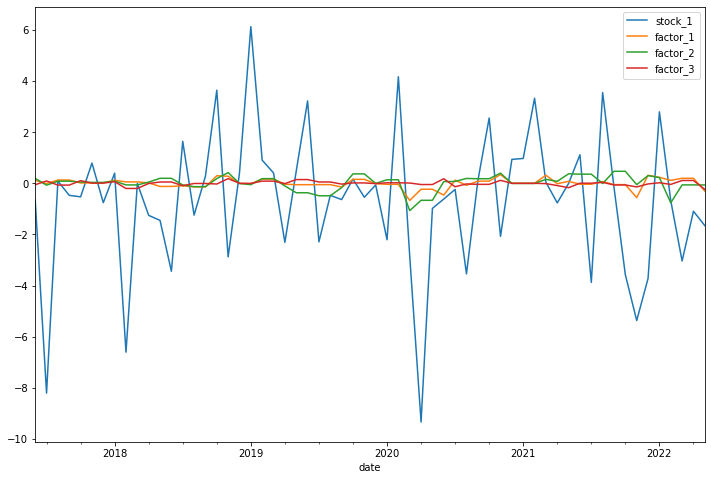

In [177]:

factors.plot(figsize=[12,8])

In [1027]:
#conda install -c conda-forge -c pytorch u8darts-all

In [443]:
# LAG PLOT
from pandas.plotting import lag_plot
# https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

In [5]:
rolling_window1=factors.stock_1.rolling(window=20).mean()
rolling_window2=factors.factor_1.rolling(window=20).mean()
rolling_window3=factors.factor_2.rolling(window=20).mean()
rolling_window4=factors.factor_3.rolling(window=20).mean()

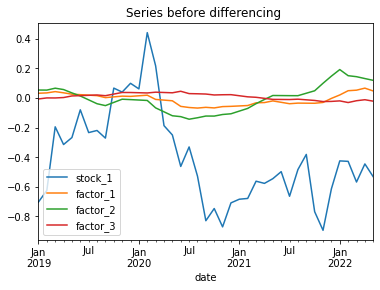

In [181]:
factors['stock_1'] =factors.stock_1.rolling(window=20).mean()
factors['factor_1'] =factors.factor_1.rolling(window=20).mean()
factors['factor_2'] =factors.factor_2.rolling(window=20).mean()
factors['factor_3'] =factors.factor_3.rolling(window=20).mean()
factors=factors.dropna()
factors['stock_1'].plot()
factors['factor_1'].plot()
factors['factor_2'].plot()
factors['factor_3'].plot()

pyplot.title(label="Series before differencing ")
pyplot.legend(['stock_1','factor_1','factor_2','factor_3'])


In [182]:
# Differencing the 1st time to make them stationary 
factors['stock_1']=factors['stock_1'].diff()
factors['factor_1']=factors['factor_1'].diff()
factors['factor_2']=factors['factor_2'].diff()

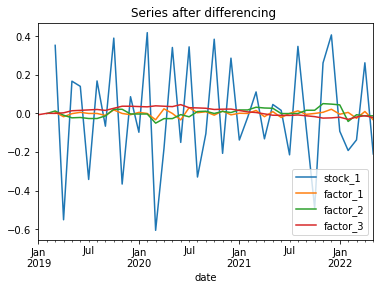

In [196]:
factors['stock_1'].plot()
factors['factor_1'].plot()
factors['factor_2'].plot()
factors['factor_3'].plot()
pyplot.title(label="Series after differencing ")
pyplot.legend(['stock_1','factor_1','factor_2','factor_3'])

In [185]:
# difference 2nd time to remove serial correlation( autocorrelation)
factors['stock_1']=factors['stock_1'][1:].diff()
factors['factor_1']=factors['factor_1'][1:].diff()


<AxesSubplot:xlabel='date'>

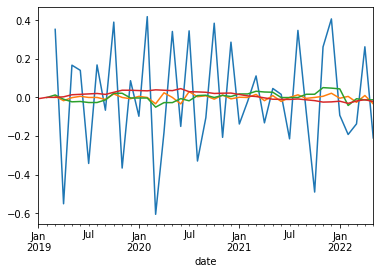

In [186]:
factors['stock_1'].plot()
factors['factor_1'].plot()
factors['factor_2'].plot()
factors['factor_3'].plot()

In [205]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(factors['factor_1'][2:], 
               lags=10, 
               return_df=True)['lb_pvalue']

1     0.005860
2     0.021577
3     0.045365
4     0.088834
5     0.048049
6     0.076497
7     0.119165
8     0.161971
9     0.223433
10    0.296897
Name: lb_pvalue, dtype: float64

In [92]:

def print_results(output, test='adf'):    
    pval = output[1]
    test_score = output[0]
    lags = output[2]    
    decision = 'Non-Stationary'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Stationary'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Stationary'            
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Numbers of lags': lags,
    'decision': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value
       
    return pd.Series(output_dict, name=test)

adf_output = tsa.adfuller(factors['stock_1'][1:])
print_results(adf_output, 'adf')

Test Statistic           -6.596015
p-value                        0.0
Numbers of lags                  0
decision                Stationary
Critical Value (1%)        -3.6104
Critical Value (5%)      -2.939109
Critical Value (10%)     -2.608063
Name: adf, dtype: object

Text(0.5, 1.0, 'Cross-correlation series plot ')

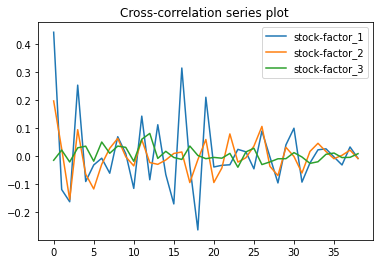

In [211]:
import statsmodels.api as sm

#https://www.statology.org/cross-correlation-in-python/
# MAKE SURE SERIES ARE STATIONARY ELSE CANNOT USE CCF
#https://link.springer.com/article/10.3758/s13428-015-0611-2#:~:text=The%20stationarity%20of%20both%20series,risk%20of%20spurious%20cross%2Dcorrelations.
x=pyplot.plot(sm.tsa.stattools.ccf(factors['stock_1'][2:], factors['factor_1'][2:], adjusted=False))
y=pyplot.plot(sm.tsa.stattools.ccf(factors['stock_1'][2:], factors['factor_2'][2:], adjusted=False)) 
z=pyplot.plot(sm.tsa.stattools.ccf(factors['stock_1'][2:], factors['factor_3'][2:], adjusted=False))
pyplot.legend(['stock-factor_1','stock-factor_2','stock-factor_3'])
pyplot.title(label="Cross-correlation series plot ")
# factor1 and factor2 essentually might be the same thing or atleast give the same information.
# Factor3 has negative correlation with stock1

In [214]:
x1=sm.tsa.stattools.ccf(factors['stock_1'][2:], factors['factor_1'][2:], adjusted=False)
y1=sm.tsa.stattools.ccf(factors['stock_1'][2:], factors['factor_2'][2:], adjusted=False)
z1=sm.tsa.stattools.ccf(factors['stock_1'][2:], factors['factor_3'][2:], adjusted=False)

In [215]:
data = {'stock-factor_1': x1,
        'stock-factor_2': y1,
        'stock-factor_3': z1}
df = pd.DataFrame(data)

                stock-factor_1  stock-factor_2  stock-factor_3
stock-factor_1        1.000000        0.630183       -0.059346
stock-factor_2        0.630183        1.000000        0.041462
stock-factor_3       -0.059346        0.041462        1.000000


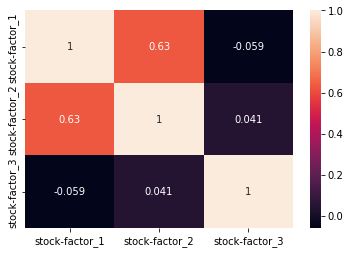

In [216]:
import seaborn as sns
# Calculate and print the correlation matrix here
correlations = df.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True);

<AxesSubplot:xlabel='date'>

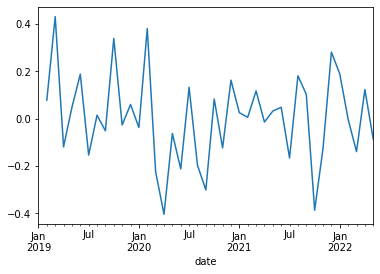

In [93]:
factors['stock_1'].plot()

In [226]:
# GRANGER CAUSALITY
#maxlag=[2]

from statsmodels.tsa.stattools import grangercausalitytests
#the order at which i put this matters 
#https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/
test_result = grangercausalitytests(factors[['factor_1','factor_2']][2:],4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6888  , p=0.2023  , df_denom=35, df_num=1
ssr based chi2 test:   chi2=1.8336  , p=0.1757  , df=1
likelihood ratio test: chi2=1.7907  , p=0.1808  , df=1
parameter F test:         F=1.6888  , p=0.2023  , df_denom=35, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4815  , p=0.0429  , df_denom=32, df_num=2
ssr based chi2 test:   chi2=8.0509  , p=0.0179  , df=2
likelihood ratio test: chi2=7.2843  , p=0.0262  , df=2
parameter F test:         F=3.4815  , p=0.0429  , df_denom=32, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1163  , p=0.1198  , df_denom=29, df_num=3
ssr based chi2 test:   chi2=7.8814  , p=0.0485  , df=3
likelihood ratio test: chi2=7.1270  , p=0.0680  , df=3
parameter F test:         F=2.1163  , p=0.1198  , df_denom=29, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.0951  , p=0.0005  , df_d

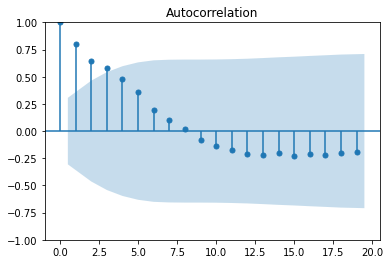

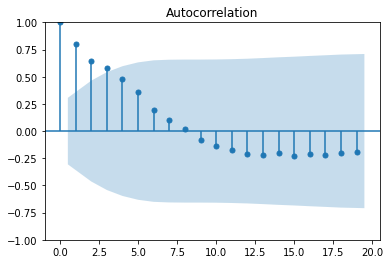

In [2073]:
#The main motivation for studying conditional heteroskedasticity in finance is that of volatility of asset returns
# Volatility is an incredibly important concept in finance because it is highly synonymous with risk.
#
#grangercausalitytests(factors[['stock_1', 'factor_1']], maxlag=[10])
plot_acf(factors['stock_1'], lags=19)

In [547]:
#https://blogs.sap.com/2021/05/06/a-multivariate-time-series-modeling-and-forecasting-guide-with-python-machine-learning-client-for-sap-hana/#:~:text=A%20Multivariate%20Time%20Series%20consist,some%20dependency%20on%20other%20variables.

from statsmodels.tsa.stattools import grangercausalitytests

maxlag=18

data_differenced=data.columns  
matrix = pd.DataFrame(np.zeros((len(data_differenced), len(data_differenced))), columns=data_differenced, index=data_differenced)
for col in matrix.columns:
    
    for row in matrix.index:
        test_result = grangercausalitytests(data[[row, col]], maxlag=18, verbose=False)            
        p_values = [round(test_result[i+1][0]['ssr_chi2test'][1],4) for i in range(maxlag)]            
        min_p_value = np.min(p_values)
        matrix.loc[row, col] = min_p_value
matrix.columns = [var + '_x' for var in data_differenced]
matrix.index = [var + '_y' for var in data_differenced]
print(matrix)

            stock_1_x  factor_1_x  factor_2_x  factor_3_x
stock_1_y       1.000         0.0         0.0         0.0
factor_1_y      0.000         1.0         0.0         0.0
factor_2_y      0.000         0.0         1.0         0.0
factor_3_y      0.006         0.0         0.0         1.0


In [162]:
#We do not reject any signal
factors=factors.dropna()
#data_differenced.dropna()
#factors['stock_1']
# stock,factor1,factor2,factor3 - 2,2,1,0